In [1]:
import numpy as np
import pandas as pd

In [2]:
#Loading the dataset
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#inspecting the data a bit
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#aparently there are no null values across all the columns
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# the id column should be dropped
#the columns should be label encoded
#total_charges column is object should be float


#importing dependencies for that
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
columns=['Dependents','Churn','TechSupport','Contract','DeviceProtection','gender','Partner','SeniorCitizen','PaymentMethod','StreamingTV', 'StreamingMovies','PhoneService', 'MultipleLines', 'InternetService','PaperlessBilling','OnlineSecurity', 'OnlineBackup',]

In [22]:
for column in columns:
  df[column]=encoder.fit_transform(df[column])


In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [24]:
df.drop(columns=['customerID'],inplace=True)

In [27]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges']=df['TotalCharges'].fillna(0)
print(df['TotalCharges'].dtype)

float64


In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#EDA

##UNIVARIATE_ANALYSIS
###Numerical_Columns
- mothly charges
- total charges

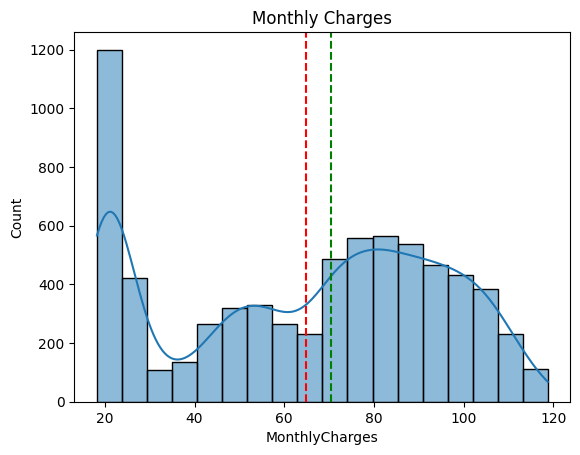

In [32]:
sns.histplot(df['MonthlyCharges'],kde=True)
plt.title('Monthly Charges')
plt.axvline(df['MonthlyCharges'].mean(),color='red',linestyle='--')
plt.axvline(df['MonthlyCharges'].median(),color='green',linestyle='--')
plt.show()

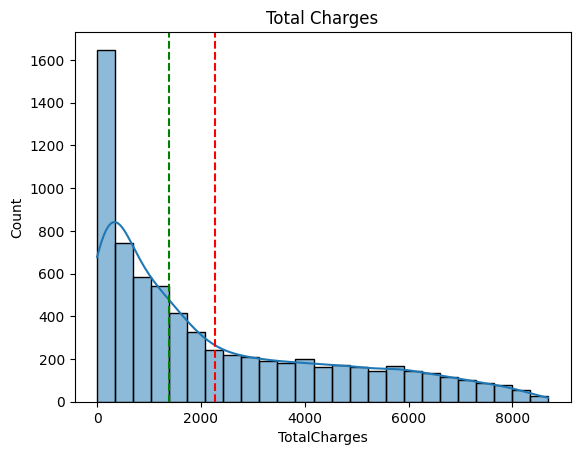

In [33]:
sns.histplot(df['TotalCharges'],kde=True)
plt.title('Total Charges')
plt.axvline(df['TotalCharges'].mean(),color='red',linestyle='--')
plt.axvline(df['TotalCharges'].median(),color='green',linestyle='--')
plt.show()

- clearlly evidant the the data is not uniformly distributed so it should be treated in case of some algos other may not be bound with specific dist types

###Categorical columns

In [34]:
columns=['Dependents','Churn','TechSupport','Contract','DeviceProtection','gender','Partner','SeniorCitizen','PaymentMethod','StreamingTV', 'StreamingMovies','PhoneService', 'MultipleLines', 'InternetService','PaperlessBilling','OnlineSecurity', 'OnlineBackup',]

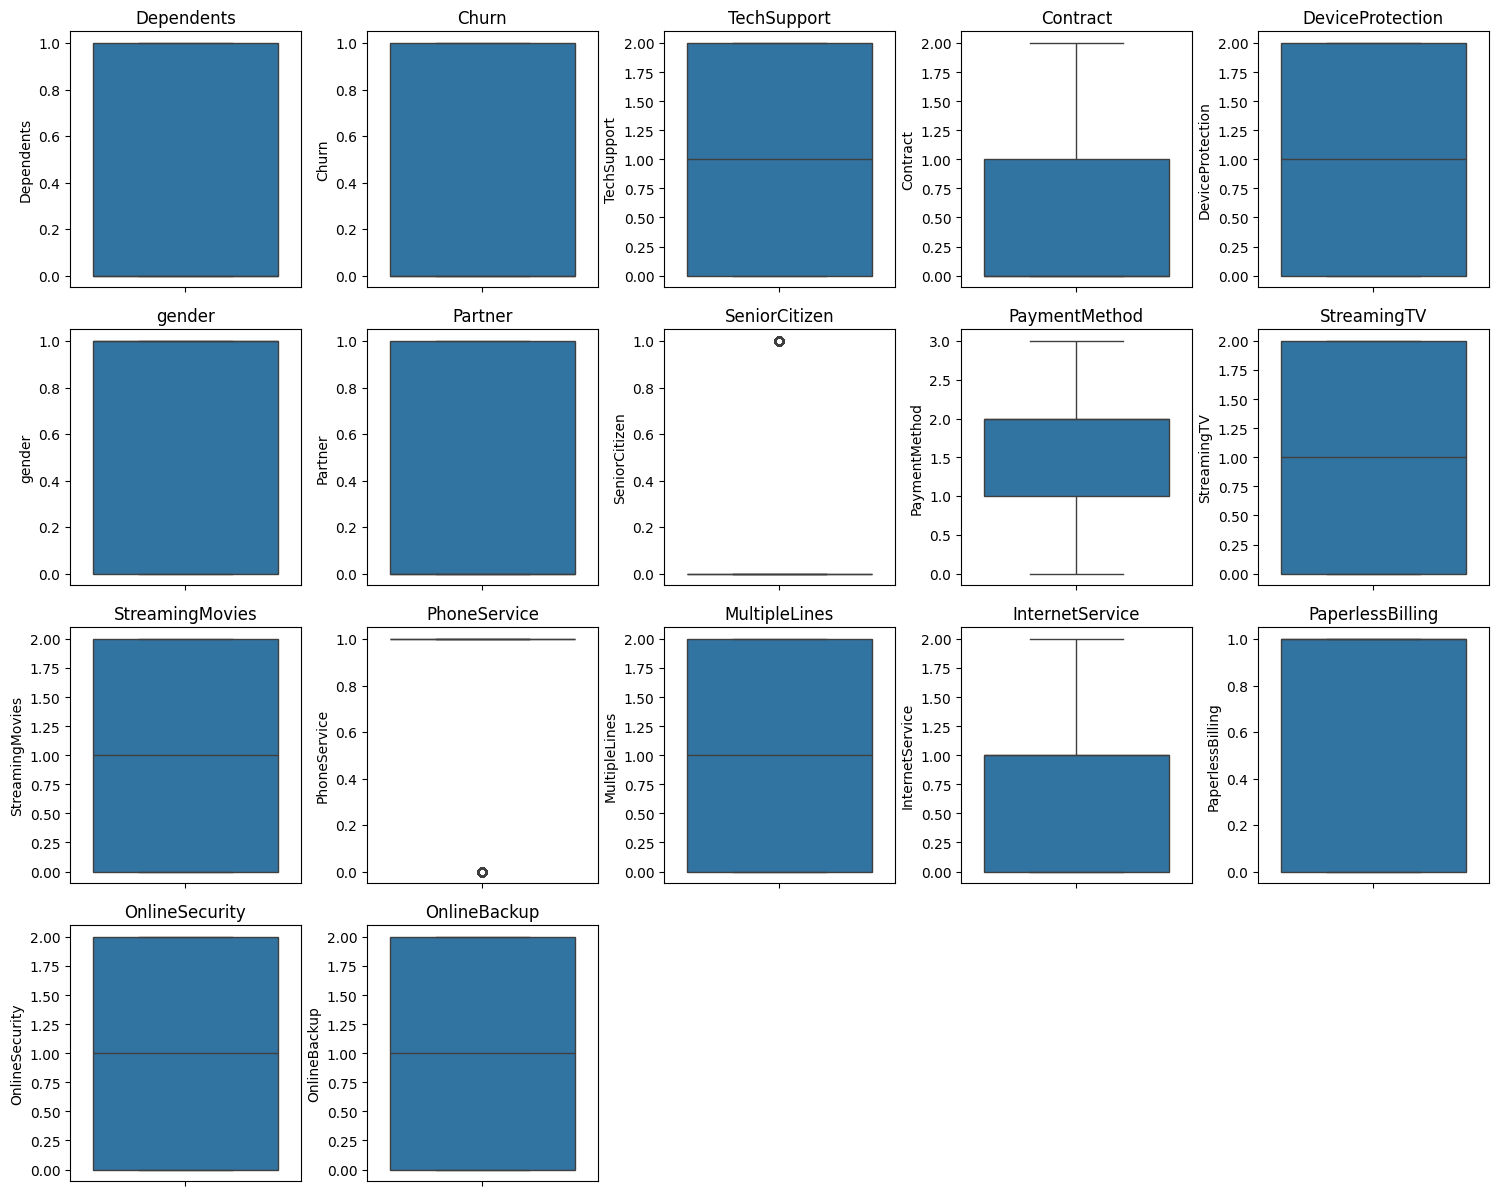

In [43]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

- there is a clear class imbalance in case of phone service senior citizen
- there is also imbalance between churn

<Axes: ylabel='count'>

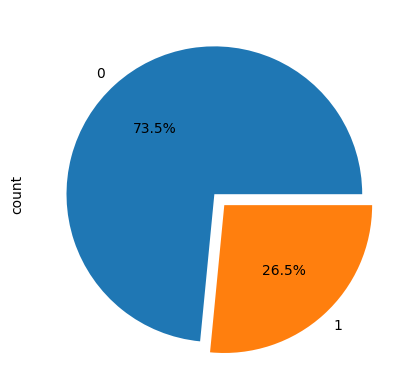

In [44]:
df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1])

<Axes: ylabel='count'>

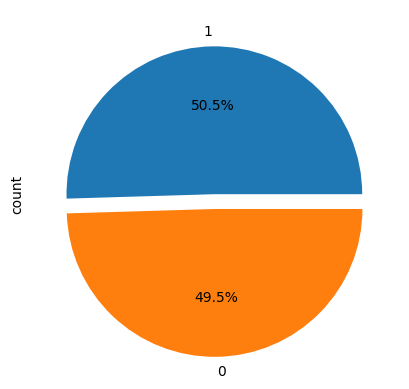

In [48]:
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1])


<Axes: ylabel='count'>

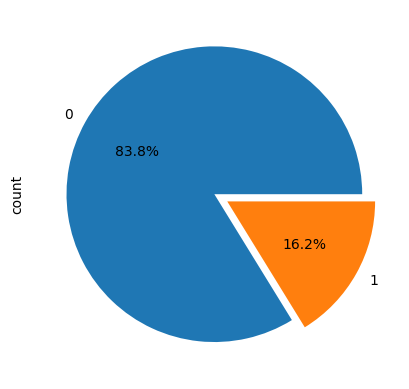

In [49]:
df['SeniorCitizen'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1])

##BIVARIATE_ANALYSIS

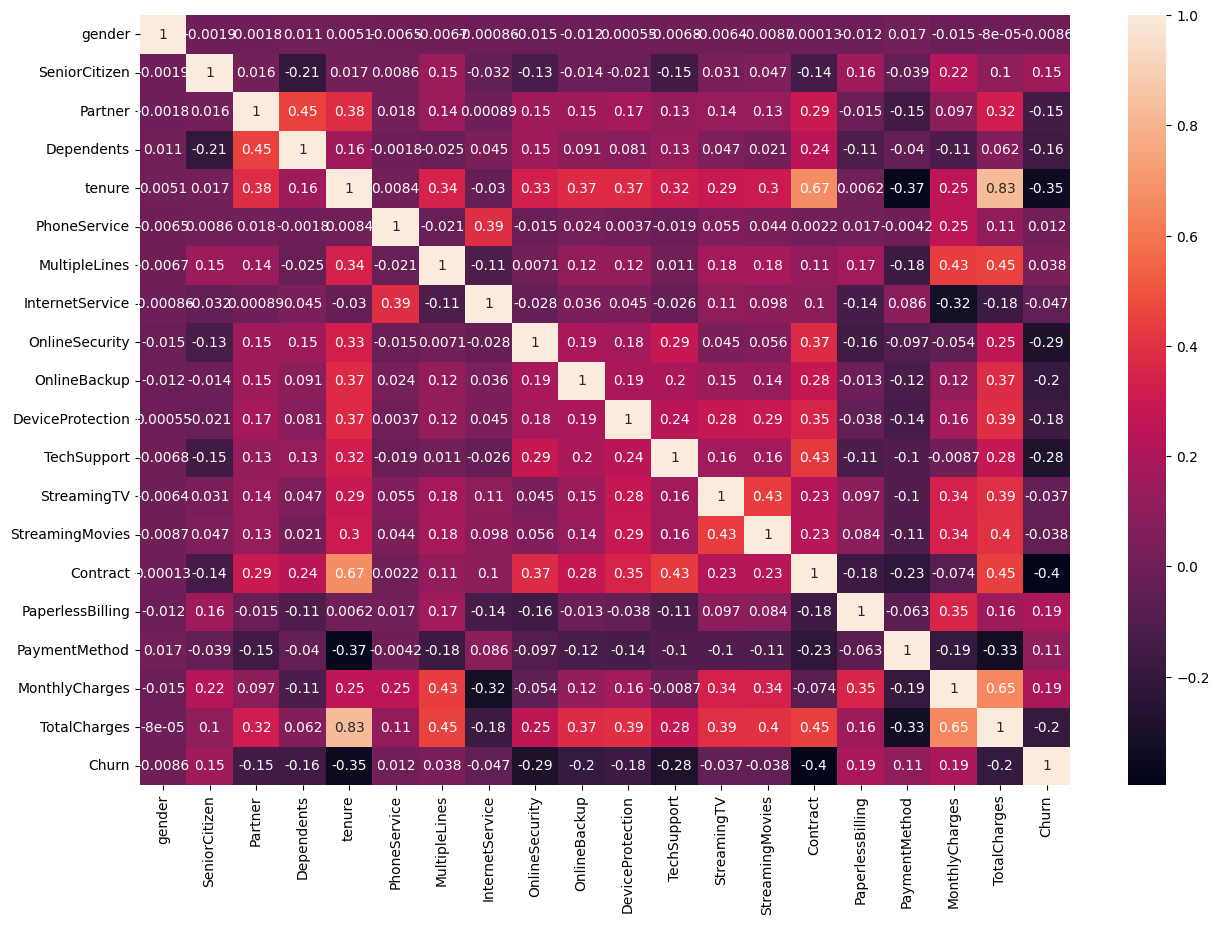

In [47]:
#correlation matrix
corr_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()

- there  are no signs of high multi colliniarity

#ModelBuilding

In [59]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.2 MB/s eta 0:00:00


In [63]:
import optuna

In [54]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
X=df.drop(columns=['Churn'])
y=df['Churn']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
# the data is imbalance keep in mind
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)


In [60]:
clf=RandomForestClassifier()


In [69]:
def objective(trial):
  params={
      'n_estimators':trial.suggest_int('n_estimators',100,1000),
      'max_depth':trial.suggest_int('max_depth',1,10),
      'min_samples_split':trial.suggest_int('min_samples_split',2,10),
      'min_samples_leaf':trial.suggest_int('min_samples_leaf',1,10),
      'max_features':trial.suggest_categorical('max_features',[None,'sqrt','log2'])

  }
  clf.set_params(**params)
  clf.fit(X_train_smote,y_train_smote)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  return accuracy


In [70]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=10)

[I 2025-09-30 04:42:23,548] A new study created in memory with name: no-name-bc1d86c6-9fac-426b-87e1-47ec5989df89
[I 2025-09-30 04:42:40,532] Trial 0 finished with value: 0.7679205110007097 and parameters: {'n_estimators': 917, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 0 with value: 0.7679205110007097.
[I 2025-09-30 04:42:46,494] Trial 1 finished with value: 0.7828246983676366 and parameters: {'n_estimators': 881, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7828246983676366.
[I 2025-09-30 04:42:52,436] Trial 2 finished with value: 0.6898509581263307 and parameters: {'n_estimators': 703, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 1 with value: 0.7828246983676366.
[I 2025-09-30 04:43:03,923] Trial 3 finished with value: 0.7757274662881476 and parameters: {'n_estimators': 564, 'max_depth': 8, 'min_sam

In [71]:
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best parameters: {'n_estimators': 881, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
Best accuracy: 0.7828246983676366


In [72]:
#Lets try with some othe models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [76]:
lr=LogisticRegression(random_state=42,max_iter=500)
svm=SVC()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
xgb=XGBClassifier()
gb=GradientBoostingClassifier()

In [77]:
def check_model(model):
  model.fit(X_train_smote,y_train_smote)
  y_pred=model.predict(X_test)
  return accuracy_score(y_test,y_pred)

In [78]:
models=['lr','svm','dt','knn','xgb','gb']
for i in models:
  print(f'{i} accuracy is {check_model(eval(i))}')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr accuracy is 0.7622427253371186
svm accuracy is 0.6905606813342796
dt accuracy is 0.7239176721078779
knn accuracy is 0.7189496096522356
xgb accuracy is 0.7778566359119943
gb accuracy is 0.7743080198722498


- the xgboost is abetter contestant lets try witrh this one

In [79]:
# this piece of code is generated by chatgpt to save me some time
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),  # L1 regularization
        "reg_lambda": trial.suggest_float("reg_lambda", 1.0, 10.0),  # L2 regularization
        "random_state": 42,
        "n_jobs": -1,
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [80]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=10)

[I 2025-09-30 04:52:30,807] A new study created in memory with name: no-name-1a27c7c9-5203-452f-92ea-21bbb731ebad
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:52:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-09-30 04:52:32,614] Trial 0 finished with value: 0.8019872249822569 and parameters: {'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.18569621869380604, 'subsample': 0.8142071198759634, 'colsample_bytree': 0.7198407973089727, 'gamma': 0.5019465786136657, 'min_child_weight': 9, 'reg_alpha': 3.6776769385766306, 'reg_lambda': 7.579957008676222}. Best is trial 0 with value: 0.8019872249822569.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:52:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-09-30 04:52:33,019]

In [81]:
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best parameters: {'n_estimators': 550, 'max_depth': 4, 'learning_rate': 0.013740604650509972, 'subsample': 0.7325192762882393, 'colsample_bytree': 0.7046563648198816, 'gamma': 1.0361220893188439, 'min_child_weight': 4, 'reg_alpha': 6.015131340701031, 'reg_lambda': 3.2209377061176814}
Best accuracy: 0.815471965933286


### XGBoost is the final_modal foor this task

In [82]:
import pickle

In [83]:
with open('xgb_model.pkl','wb') as f:
  pickle.dump(xgb,f)